# Data Analysis
1. Computer Science
2. Mathematics & Statistics
3. Machine Learning & Artificial Intelligence

## Tools
- numpy
- matplotlib
- pandas
- scikit-learn
- bokeh
- seaborn
- nltk
- wordcloud
- stopwords

In [2]:
# Meng-import library
import pandas as pd
import numpy as np
from collections import Counter

# Membaca csv
df = pd.read_csv("Data/listings.csv")
# df = df[['id', 'name', 'summary', 'longitude', 'latitude', 'space', 'description', 'instant_bookable', 'host_response_time', 'street', 'zipcode', 'review_scores_rating', 'property_type']]

# Ganti kolom NaN dengan 0
df.fillna(0, inplace=True)

# Meng-ekstrak kolom price
price = df['price']
prices = []

# Konversi string ke float
for p in price:
    p = float(p[1:].replace(',', ''))
    prices.append(p)
    
# Ganti kolom price dengan yang baru
df['price'] = prices

# Mengambil data yang tidak kosong
df = df[df.bathrooms > 0]
df = df[df.bedrooms > 0]
df = df[df.beds > 0]
df = df[df.price > 0]
df = df[df.review_scores_rating > 0]
df = df[df.reviews_per_month > 0]
df = df[df.accommodates > 0]

# Menampilkan header
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,0.0,0.0,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,0.0,0.0,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,0.0,0.0,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,0.0,0.0,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,0.0,0.0,f,flexible,f,f,1,1.70


In [3]:
room_type_df = df.groupby('room_type').id.count()
room_type_df = room_type_df.reset_index()
room_type_df = room_type_df.rename(columns={'id': 'number_of_listings'})
room_type_df

,room_type,number_of_listings
0,Entire home/apt,1393
1,Private room,1061
2,Shared room,52


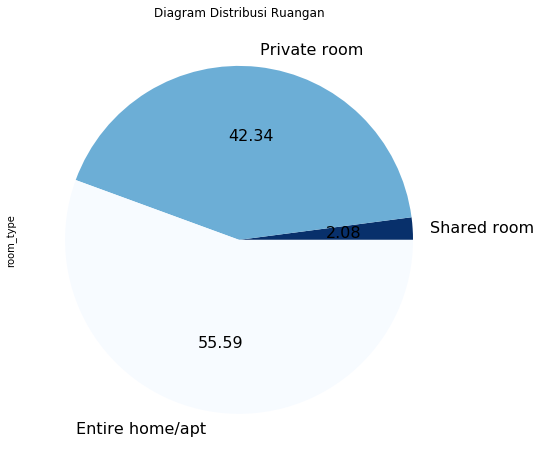

In [4]:
%matplotlib inline

# Meng-import library
import matplotlib
import matplotlib.pyplot as plt

# Mengambil data tipe ruangan
room = df.room_type
r = Counter(room)

# Membuat dataframe baru
room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']

# Plot ke diagram lingkaran
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r',
                 figsize = (8, 8),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Diagram Distribusi Ruangan')

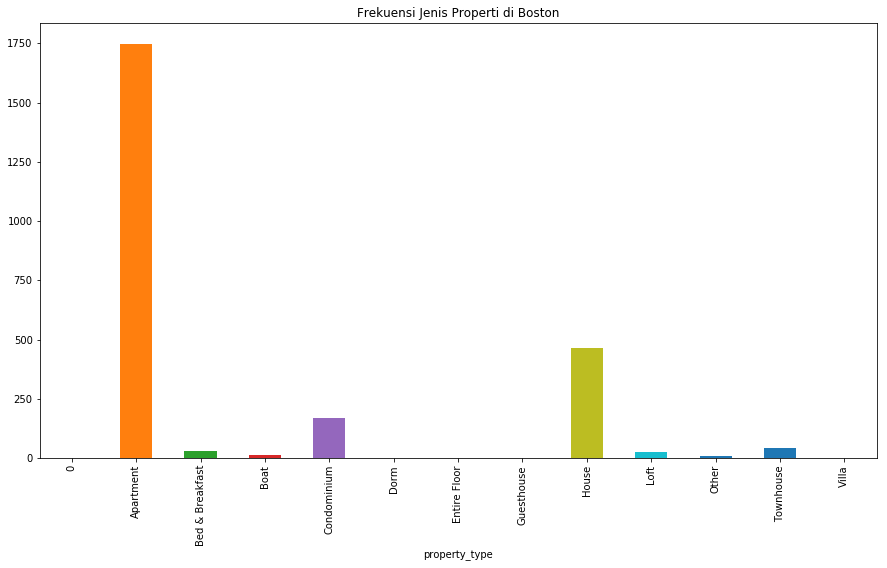

In [5]:
%matplotlib inline

# Meng-import library
import matplotlib
import matplotlib.pyplot as plt

# Menmbuat group dataframe dari tipe properti
property_type_df = df.groupby('property_type').id.count()
property_type_df = property_type_df.reset_index()
property_type_df = property_type_df.rename(columns={'id': 'number_of_listings'})

objects = property_type_df['property_type']
y_pos = property_type_df['number_of_listings']

# Plot ke diagram bar
property_type_df.plot.bar(x = 'property_type',
                          y = 'number_of_listings',
                          figsize = (15, 8),
                          title = 'Frekuensi Jenis Properti di Boston',
                          legend = False)

# Memberi label
plt.xlabel = 'Tipe Properti'
plt.ylabel = 'Frekuensi'

In [6]:
room_property_df = df.groupby(['property_type', 'room_type']).price.mean()
room_property_df = room_property_df.reset_index()
room_property_df = room_property_df.sort_values('price', ascending=[0])
room_property_df

,property_type,room_type,price
22,Townhouse,Entire home/apt,320.800000
13,Guesthouse,Entire home/apt,289.000000
7,Boat,Private room,287.000000
14,House,Entire home/apt,286.809917
6,Boat,Entire home/apt,275.222222
17,Loft,Entire home/apt,240.750000
24,Villa,Entire home/apt,240.000000
8,Condominium,Entire home/apt,239.559633
1,Apartment,Entire home/apt,224.549107
20,Other,Private room,177.428571


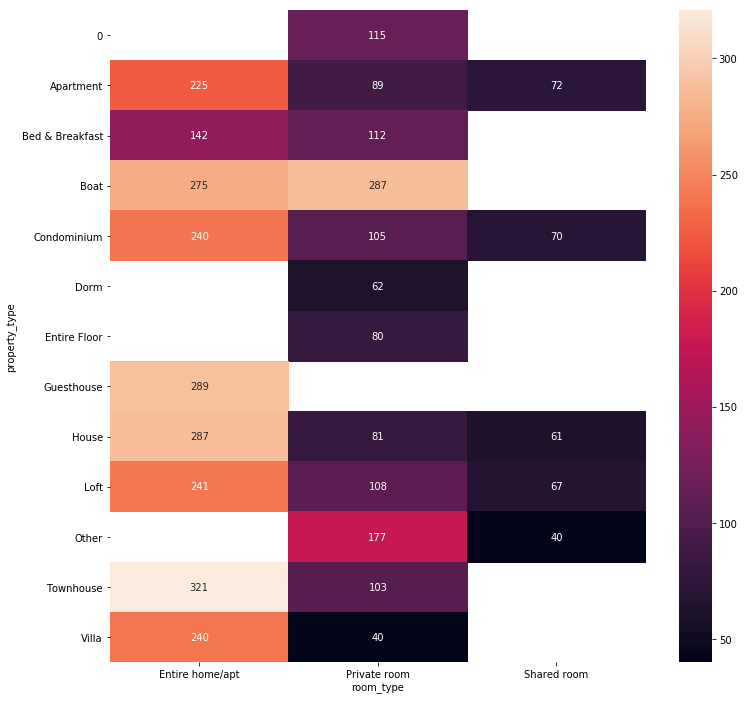

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt='.0f')

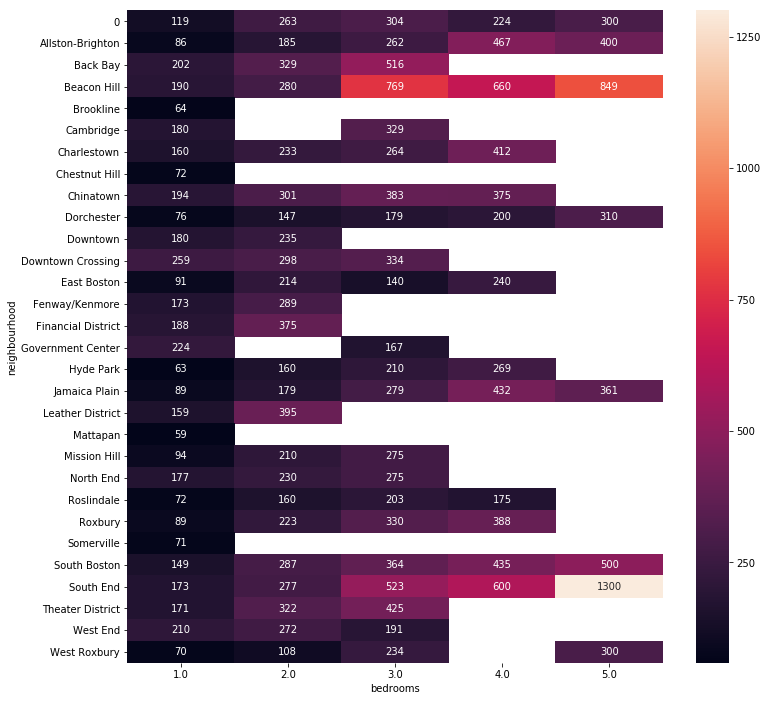

In [8]:
# HeatMap untuk variasi harga dengan jenis kamar tidur
plt.figure(figsize=(12, 12))
sns.heatmap(df.groupby(['neighbourhood', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")

In [12]:
summary_df = df[['summary', 'price']]
summary_df = summary_df[pd.notnull(summary_df['summary'])]
summary_df = summary_df[summary_df['summary'] != 0]
summary_df = summary_df.sort_values('price', ascending=[0])

top_100_df = summary_df.head(100)
top_100_df.head()

,summary,price
1022,This unique home is located in Boston's South ...,1300.0
1262,One of a kind. Just underwent a $1 mil. resto...,1250.0
3242,"2,200 sqft, 3 level, 3 bdrm, 2 bath, newly ren...",1000.0
1932,Facing the Public Garden in Boston's most eleg...,849.0
1085,Voted as the most successful AirBnb property i...,800.0


In [13]:
from nltk.corpus import stopwords
import string
import nltk

words = ''
for index, row in top_100_df.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignore_char = ['\r', '\n', '', ' ', '.', "'s"]
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

summary_data = nltk.word_tokenize(words)

words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignore_char if l not in nums]
filtered_data = [word for word in words_only if word not in stopwords.words('english')]

wnl = nltk.WordNetLemmatizer()
final_data = [wnl.lemmatize(data) for data in filtered_data]

final_words = ' '.join(final_data)
final_words[:50]

'unique home located boston south end truly vibrant'

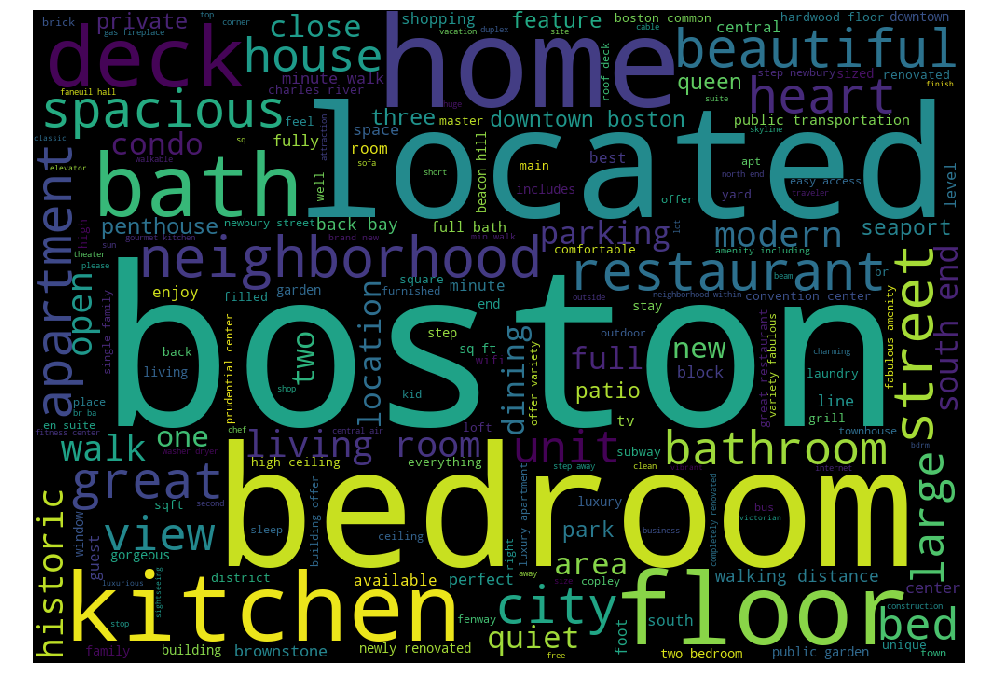

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1000, height=700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()